<ipython-input-3-308272ac39d3>:87: RuntimeWarning: invalid value encountered in divide
  cax1 = axs[1,3].imshow((blownup_distance_matrix-trx_distance_mx)/blownup_distance_matrix)


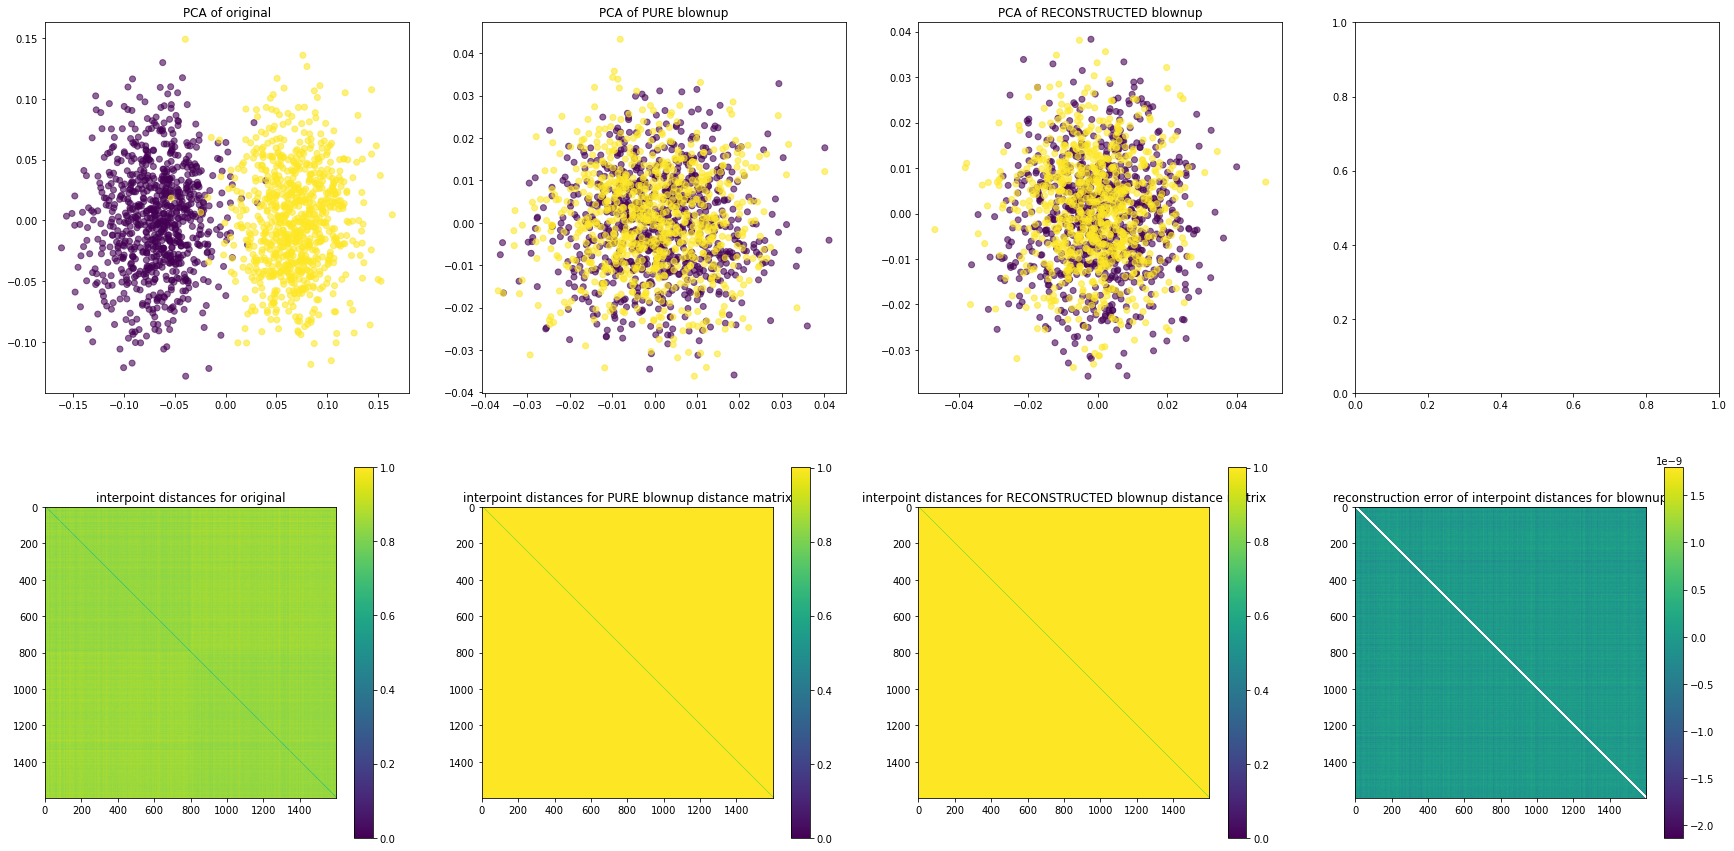

In [3]:
import numpy as np
from Functions import *
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.datasets import load_digits
from sklearn import random_projection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import pairwise_distances
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import johnson_lindenstrauss_min_dim


np.random.seed(42)


### generates 2 gaussians,

c = 800
nperr = 800
dim = 400
perp = nperr
X,y = randomGaussians2(d=dim, nper=nperr, scaling=9)
X /= np.max(pairwise_distances(X))
"""
# Load the digits dataset
c=300
perp = 30
digits = load_digits()
X = digits.data  # Feature matrix
y = digits.target  # Labels
ixs = np.where(y>6)
X = X[ixs]
y = y[ixs]
X /= np.max(pairwise_distances(X))
"""



### blow-up procedure 
n=len(X)

### interpoint distance matrix of Y; blownup!
distance_mx = squareform(pdist(X, metric='euclidean'))
blownup_distance_matrix = distance_mx/c +  np.ones((n,n))- np.identity(n)
### MDS reconstruction of the blownup interpoint distances, and corresponding interpoint distances
X_transformed = cMDS(blownup_distance_matrix, n-1)
trx_distance_mx = squareform(pdist(X_transformed, metric='euclidean'))
### Johnson-Lindenstrauss reduction of this (commented out because it requires hundreds of thousands of points)
"""nnew = johnson_lindenstrauss_min_dim(n_samples=n, eps=0.05)
print('old_dim:', 2*nperr-1)
print('new_dim:', nnew-1)
#print(nnew)
X_transformed = GaussianRandomProjection(n_components=nnew).fit_transform(X_transformed)"""

fig, axs = plt.subplots(2,4, figsize=(30,15))


pca = PCA(n_components=2) 
H = np.eye(n) - np.ones((n, n)) / n

X_pca = pca.fit_transform(X)
X_transformed_pca_pure = pca.fit_transform( -0.5 * H @ blownup_distance_matrix**2 @ H )
X_transformed_pca = pca.fit_transform( -0.5 * H @ trx_distance_mx**2 @ H)

axs[0,0].set_title('PCA of original')
axs[0,0].scatter(X_pca[:,0], X_pca[:,1], c=y,alpha=0.6)
axs[0,1].set_title('PCA of PURE blownup')
axs[0,1].scatter(X_transformed_pca_pure[:,0], X_transformed_pca_pure[:,1], c=y,alpha=0.6)
axs[0,2].set_title('PCA of RECONSTRUCTED blownup')
axs[0,2].scatter(X_transformed_pca[:,0], X_transformed_pca[:,1], c=y,alpha=0.6)

cax00 = axs[1,0].imshow(distance_mx)
axs[1,0].set_title('interpoint distances for original')
fig.colorbar(cax00, ax=axs[1,0])

cax0 = axs[1,1].imshow(blownup_distance_matrix)
axs[1,1].set_title('interpoint distances for PURE blownup distance matrix')
fig.colorbar(cax0, ax=axs[1,1])

cax0 = axs[1,2].imshow(trx_distance_mx)
axs[1,2].set_title('interpoint distances for RECONSTRUCTED blownup distance matrix')
fig.colorbar(cax0, ax=axs[1,2])

cax1 = axs[1,3].imshow((blownup_distance_matrix-trx_distance_mx)/blownup_distance_matrix)
axs[1,3].set_title('reconstruction error of interpoint distances for blownup')
fig.colorbar(cax1, ax=axs[1,3])

#cax2 = axs[0,2].hist(np.array((blownup_distance_matrix-trx_distance_mx)/distance_mx).flatten())
#fig.colorbar(cax2, ax=axs[0,2])

[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.148778
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.036653
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.036653


<ipython-input-4-993f952bc5c4>:30: RuntimeWarning: invalid value encountered in divide
  cax = axs[0,3].imshow(100*(P-P_trx_reconstructed)/P)
<ipython-input-4-993f952bc5c4>:42: RuntimeWarning: invalid value encountered in divide
  cax = axs[1,3].hist(np.array(100*(P-P_trx_reconstructed)/P).flatten())


MIN and MAX of P: 0.0  and  3.175331503584743e-05
NUMBER OF NONZERO IN P: 2558400

MIN and MAX of P_trx_pure: 0.0  and  1.5683838994471112e-06
NUMBER OF NONZERO IN P_trx_pure: 2558400


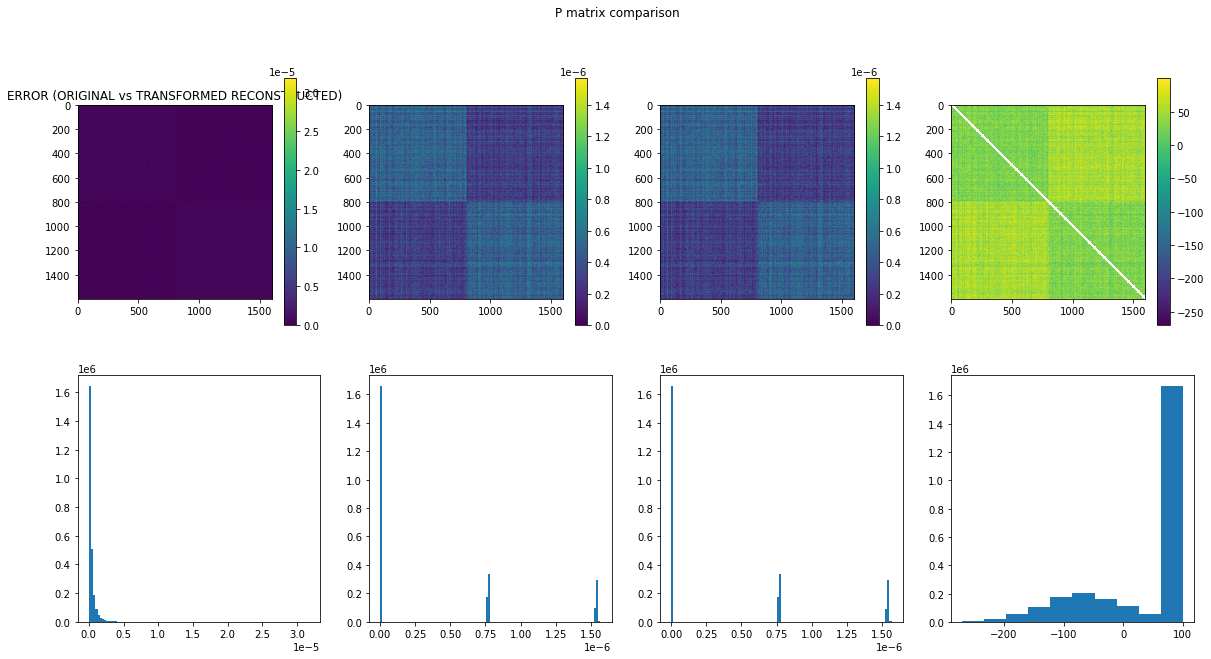

In [4]:
import sys
import os
sys.path.append('/Users/noahbergam/Desktop/tsne-mode-collapse/compute-P-matrix')
from P_matrix import *



P = squareform(joint_probabilities(distance_mx, desired_perplexity=perp, verbose=1))
P_trx_pure = squareform(joint_probabilities(blownup_distance_matrix, desired_perplexity=perp, sigmas=None, verbose=1))
P_trx_reconstructed = squareform(joint_probabilities(trx_distance_mx, desired_perplexity=perp, sigmas=None, verbose=1))

fig, axs = plt.subplots(2,4, figsize=(20,10))

fig.suptitle('P matrix comparison')

axs[0,0].set_title('P matrix, ORIGINAL')
cax = axs[0,0].imshow(P)
fig.colorbar(cax, ax=axs[0,0])

axs[0,1].set_title('P matrix, TRANSFORMED (PURE)')
cax = axs[0,1].imshow(P_trx_pure)
fig.colorbar(cax, ax=axs[0,1])


axs[0,2].set_title('P matrix, TRANSFORMED (RECONSTRUCTED)')
cax = axs[0,2].imshow(P_trx_reconstructed)
fig.colorbar(cax, ax=axs[0,2])

axs[0,3].set_title('ERROR (ORIGINAL vs TRANSFORMED RECONSTRUCTED)')
cax = axs[0,3].imshow(100*(P-P_trx_reconstructed)/P)
fig.colorbar(cax, ax=axs[0,3])

cax = axs[1,0].hist(P.flatten(), bins=100)
#fig.colorbar(cax, ax=axs[0])

cax = axs[1,1].hist(P_trx_pure.flatten(),bins=100)
#fig.colorbar(cax, ax=axs[1])

cax = axs[1,2].hist(P_trx_reconstructed.flatten(),bins=100)


cax = axs[1,3].hist(np.array(100*(P-P_trx_reconstructed)/P).flatten())
#fig.colorbar(cax, ax=axs[2])
#P_trx = joint_probabilities(trx_distance_mx, desired_perplexity=30, verbose=0)

print('MIN and MAX of P:', min(P.flatten()), ' and ', max(P.flatten()))
print('NUMBER OF NONZERO IN P:', np.count_nonzero(P.flatten()))
print()
print('MIN and MAX of P_trx_pure:', min(P_trx_pure.flatten()), ' and ', max(P_trx_pure.flatten()))
print('NUMBER OF NONZERO IN P_trx_pure:', np.count_nonzero(P_trx_pure.flatten()))


In [ ]:
# SANITY CHECK: the NN accuracy should NOT change since the rankings of nearest neighbors should stay the same

### compare KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

clfs = [KNeighborsClassifier(n_neighbors=10), MLPClassifier(random_state=1, max_iter=1000),DecisionTreeClassifier(random_state=0), GaussianNB(),AdaBoostClassifier(algorithm="SAMME", random_state=42),]
names = ['KNN', 'MLP', 'DT', 'NB', 'AdaBoost']

for i in range(len(clfs)):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    clfs[i].fit(X_train, y_train)
    y_pred = clfs[i].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(names[i] + 'accuracy on Original:', accuracy)

    X_train_trx, X_test_trx, y_train_trx, y_test_trx = train_test_split(X_transformed, y, test_size=0.33, random_state=42)

    clfs[i].fit(X_train_trx, y_train_trx)
    y_pred = clfs[i].predict(X_test_trx)
    accuracy = accuracy_score(y_test_trx, y_pred)
    print(names[i] + ' accuracy on Blownup:', accuracy)

    print()

/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

KNNaccuracy on Original: 0.8977272727272727
KNN accuracy on Blownup: 0.8977272727272727

MLPaccuracy on Original: 0.9053030303030303
MLP accuracy on Blownup: 0.028409090909090908

DTaccuracy on Original: 0.9621212121212122
DT accuracy on Blownup: 0.9640151515151515

NBaccuracy on Original: 0.9678030303030303
NB accuracy on Blownup: 0.8446969696969697

AdaBoostaccuracy on Original: 0.9659090909090909
AdaBoost accuracy on Blownup: 0.9753787878787878



In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=perp)
Y = tsne.fit_transform(X)

tsne = TSNE(n_components=2, random_state=0, perplexity=perp)
Y_transformed = tsne.fit_transform(X_transformed)

#Y, loss_curve, radius_curve, Z_curve = tsne_(P_basic, no_dims=2, max_iter=1000, simple_grad=False)
#P_basic_transformed = BASIC_P(blownup_distance_matrix, c)
#Y_transformed, loss_curve, radius_curve, Z_curve = tsne_(P_basic_blownup_mds, no_dims=2, max_iter=1000, simple_grad=False)
#transformer = random_projection.GaussianRandomProjection(eps=0.5)
#X_transformed = transformer.fit_transform(X_transformed)


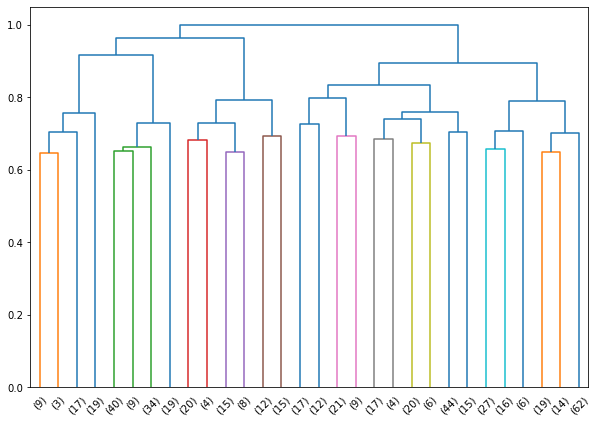

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

clustering = AgglomerativeClustering(linkage='ward', n_clusters=2)
clustering.fit(X)

# Create linkage matrix
Z = linkage(X, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z,
           orientation='top',
           truncate_mode='lastp',
           labels=y,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

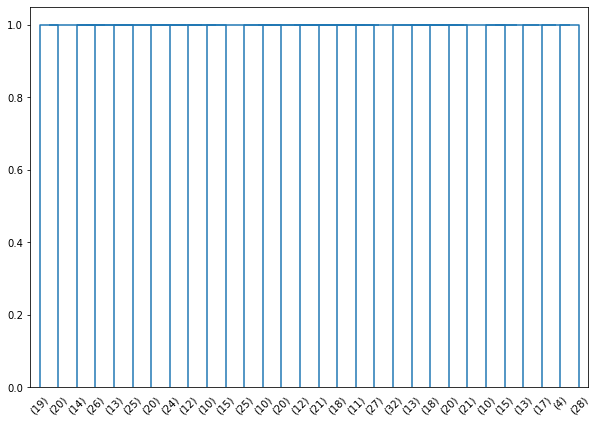

In [ ]:
clustering_transformed = AgglomerativeClustering(linkage='ward', n_clusters=2).fit(X_transformed)

# Create linkage matrix
Z_transformed = linkage(X_transformed, method='ward')


# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendo = dendrogram(Z_transformed, orientation='top',
           labels=y,
           truncate_mode='lastp',
           #distance_sort='descending',
           show_leaf_counts=True)

# Apply the colors to the end links
plt.show()

percent errors on original: 0.0
percent errors on blownup: 0.0


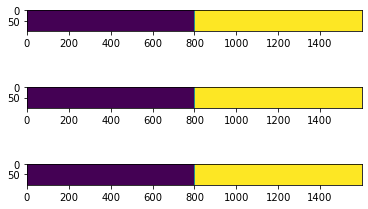

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward', n_clusters=2).fit(X)

clustering_transformed = AgglomerativeClustering(linkage='ward', n_clusters=2).fit(X_transformed)


fig, axs = plt.subplots(3,1) #, figsize=(20,10))

axs[0].imshow( np.tile(y, (100, 1)))

axs[1].imshow( np.tile(clustering.labels_, (100, 1)))

axs[2].imshow( np.tile(clustering_transformed.labels_, (100, 1)))

y= np.array(y)

print('percent errors on original:', 100*sum((y - clustering.labels_)**2)/len(y))
print('percent errors on blownup:', 100*sum((y - clustering_transformed.labels_)**2)/len(y))


In [ ]:
print(y[:10] - 7)
print(clustering.labels_[:10])
print(clustering_transformed.labels_[:10])

[0 1 2 0 1 2 0 1 2 2]
[0 1 2 0 1 2 0 1 2 2]
[0 1 2 0 1 2 0 1 2 2]


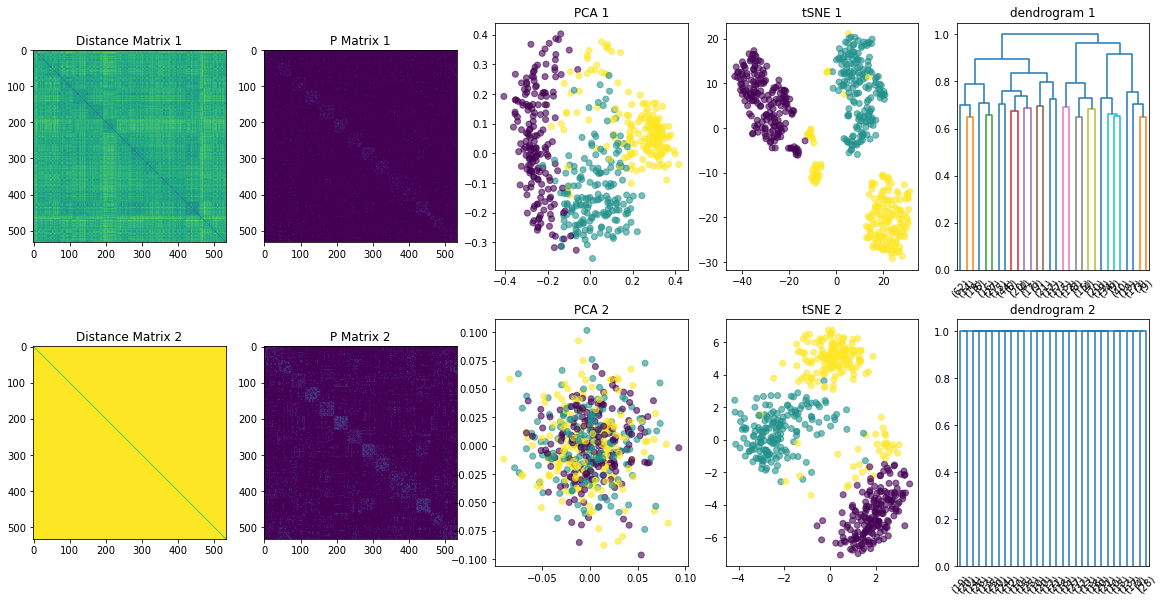

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))

#plt.gca().set_aspect('equal', adjustable='box')

# Plotting on each subplot
axs[0, 0].imshow(distance_mx)
axs[0, 0].set_title('Distance Matrix 1')

axs[1, 0].imshow(trx_distance_mx)
axs[1, 0].set_title('Distance Matrix 2')

# Plotting on each subplot
axs[0, 1].imshow(P)
axs[0, 1].set_title('P Matrix 1')

axs[1, 1].imshow(P_trx)
axs[1, 1].set_title('P Matrix 2')

# Plotting on each subplot
axs[0, 2].scatter(X_pca[:,0], X_pca[:,1],c=y,alpha=0.6)
axs[0, 2].set_title('PCA 1')
#axs[0,2].set_aspect('equal', adjustable='box')

axs[1, 2].scatter(X_transformed_pca[:,0], X_transformed_pca[:,1],c=y,alpha=0.6)
axs[1, 2].set_title('PCA 2')
#axs[1,2].set_aspect('equal', adjustable='box')

# Plotting on each subplot
axs[0, 3].scatter(Y[:,0], Y[:,1],c= y,   alpha=0.6)
axs[0, 3].set_title('tSNE 1')
#axs[0,3].set_aspect('equal', adjustable='box')

axs[1, 3].scatter(Y_transformed[:,0], Y_transformed[:,1],c= y,alpha=0.6)
axs[1, 3].set_title('tSNE 2')
#axs[1,3].set_aspect('equal', adjustable='box')

# Plotting on each subplot
dendrogram(Z, ax=axs[0,4],truncate_mode='lastp',)
axs[0, 4].set_title('dendrogram 1')

dendrogram(Z_transformed, ax=axs[1,4], truncate_mode='lastp',)
axs[1, 4].set_title('dendrogram 2')

plt.savefig('visuals/distblowup2_mnist')